#**Importing libraries**

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pandas import Series
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
from google.colab import files
!pip install catboost
from catboost import CatBoostClassifier
import numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
import shap
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,precision_score,recall_score


#**loading dataset**

In [2]:
data=pd.read_csv('/content/all_data_.csv')

In [3]:
data.shape

(14266, 99)

In [4]:
data.drop(['et0_fao_evapotranspiration','hit_object_in_carriageway','visibility','evapotranspiration','accident_index','accident_year','accident_reference','location_easting_osgr','location_northing_osgr','longitude','latitude','police_force','accident_severity','number_of_vehicles'
,'number_of_casualties','date','local_authority_district','local_authority_ons_district','local_authority_highway','local_authority_highway','first_road_class','first_road_number',
         'speed_limit','junction_detail','junction_control','second_road_class','second_road_number','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
         'special_conditions_at_site','carriageway_hazards','generic_make_model','urban_or_rural_area','did_police_officer_attend_scene_of_accident','trunk_road_flag',
         'lsoa_of_accident_location','enhanced_severity_collision','blackspot_id'], axis=1, inplace=True)

In [5]:
data.shape

(14266, 62)

In [6]:
data.drop(['nonacc_hour','nonacc_dayofweek','nonacc_datetime','datetime','label','dir_to_n','dir_to_e','dir_from_n','dir_from_e','escooter_flag','lsoa_of_driver','vehicle_left_hand_drive','first_point_of_impact'
,'hit_object_off_carriageway','skidding_and_overturning','junction_location','vehicle_location_restricted_lane','vehicle_direction_to','vehicle_direction_from','vehicle_manoeuvre',

           'vehicle_reference','accident_year_y','accident_index_y','accident_year_x','accident_index_x','Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14266 entries, 0 to 14265
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   day_of_week                  14266 non-null  int64  
 1   time                         14266 non-null  object 
 2   road_type                    14266 non-null  int64  
 3   light_conditions             14266 non-null  int64  
 4   weather_conditions           14266 non-null  int64  
 5   road_surface_conditions      14266 non-null  int64  
 6   temperature_2m               14266 non-null  float64
 7   apparent_temperature         14266 non-null  float64
 8   precipitation                14266 non-null  float64
 9   rain                         14266 non-null  float64
 10  snowfall                     14266 non-null  float64
 11  weathercode                  14266 non-null  int64  
 12  surface_pressure             14266 non-null  float64
 13  cloudcover      

In [8]:
data.isnull().sum()#checking null values

,0
day_of_week,0
time,0
road_type,0
light_conditions,0
weather_conditions,0
road_surface_conditions,0
temperature_2m,0
apparent_temperature,0
precipitation,0
rain,0


In [9]:
data=data.dropna()#droping null value colunms

In [10]:
data.isnull().sum()

,0
day_of_week,0
time,0
road_type,0
light_conditions,0
weather_conditions,0
road_surface_conditions,0
temperature_2m,0
apparent_temperature,0
precipitation,0
rain,0


In [11]:
data.shape

(13439, 36)

In [12]:
df=data

In [13]:
df['time']=pd.to_datetime(df['time'],format='%H:%M',errors="coerce").dt.hour#converting datetime format


In [14]:
df["time_group"]=(df["time"]//1)+1#rounding up time to 1-24

In [15]:
df.drop(['time'],axis=1,inplace=True)

In [16]:
df['label_accident'].value_counts()

,count
label_accident,
1,7133
0,6306


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13439 entries, 0 to 14265
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   day_of_week                  13439 non-null  int64  
 1   road_type                    13439 non-null  int64  
 2   light_conditions             13439 non-null  int64  
 3   weather_conditions           13439 non-null  int64  
 4   road_surface_conditions      13439 non-null  int64  
 5   temperature_2m               13439 non-null  float64
 6   apparent_temperature         13439 non-null  float64
 7   precipitation                13439 non-null  float64
 8   rain                         13439 non-null  float64
 9   snowfall                     13439 non-null  float64
 10  weathercode                  13439 non-null  int64  
 11  surface_pressure             13439 non-null  float64
 12  cloudcover                   13439 non-null  int64  
 13  cloudcover_low       

In [18]:
data.drop(['road_type','light_conditions','weather_conditions','road_surface_conditions','weathercode','vehicle_leaving_carriageway','propulsion_code'],axis=1,inplace=True)

#**dividing target and input features**

In [19]:
X=df.drop(columns=['label_accident'])#input features
Y=df["label_accident"]#target variable

In [20]:
#coping data for xgb for stricting the model for the pipeline django
XX=X
YY=Y

In [21]:
X = pd.get_dummies(X, drop_first=False)#taking dummines for catogorical features

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

In [24]:
Y_train.value_counts()

,count
label_accident,
1,5706
0,5706


#**Decision Tree**

as base model for benchmark

In [25]:
dt=DecisionTreeClassifier(random_state=42)

In [26]:
# Split the data again after one-hot encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Fit the model
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
Y_pred=dt.predict(X_test)

checking results

In [28]:
Accuracy=metrics.accuracy_score(Y_test,Y_pred)
print(Accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred)
print(recall)

0.7150297619047619
[[ 823  436]
 [ 330 1099]]
0.7159609120521173
0.7690692792162351


checking important features

In [29]:
dt_tree_best_depth_imp_feat=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_tree_best_depth_imp_feat.fit(X_train,Y_train)
Y_pred_best_depth_imp_feat=dt_tree_best_depth_imp_feat.predict(X_test)
imp_features=Series(dt_tree_best_depth_imp_feat.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(imp_features)

relative_humidity_2m         0.530231
time_group                   0.247999
surface_pressure             0.162999
cloudcover                   0.058771
precipitation                0.000000
apparent_temperature         0.000000
snowfall                     0.000000
rain                         0.000000
cloudcover_low               0.000000
cloudcover_mid               0.000000
day_of_week                  0.000000
temperature_2m               0.000000
windgusts_10m                0.000000
cloudcover_high              0.000000
winddirection_10m            0.000000
windspeed_10m                0.000000
vehicle_type                 0.000000
towing_and_articulation      0.000000
journey_purpose_of_driver    0.000000
dewpoint_2m                  0.000000
sex_of_driver                0.000000
age_of_driver                0.000000
engine_capacity_cc           0.000000
age_band_of_driver           0.000000
age_of_vehicle               0.000000
driver_imd_decile            0.000000
driver_home_

In [30]:
imp_features.head(20)#checking top 20 important features

,0
relative_humidity_2m,0.530231
time_group,0.247999
surface_pressure,0.162999
cloudcover,0.058771
precipitation,0.000000
apparent_temperature,0.000000
snowfall,0.000000
rain,0.000000
cloudcover_low,0.000000
cloudcover_mid,0.000000


#**Grid Search for DT**

In [31]:
d2=DecisionTreeClassifier(criterion='entropy')
depth={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20]}
grid_search=GridSearchCV(estimator=d2,param_grid=depth,scoring='precision',cv=10)
grid_search.fit(X_train,Y_train)
best_depth=grid_search.best_params_
print(best_depth)

{'max_depth': 20}


In [31]:
d_b=DecisionTreeClassifier(criterion='entropy',max_depth=20)#applying best grid
d_b.fit(X_train,Y_train)
Y_pred_b=d_b.predict(X_test)

result

In [32]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_b)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_b)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_b)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_b)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_b)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,Y_pred_b)
print(test_auc)

0.7075892857142857
[[ 823  436]
 [ 350 1079]]
0.7122112211221122
0.7550734779566131
0.733016304347826
0.704383442711428


confusion metrix

In [33]:
cm=metrics.confusion_matrix(Y_test,Y_pred_b)
print(cm)

[[ 823  436]
 [ 350 1079]]


graphical presentaion of confusion matrix

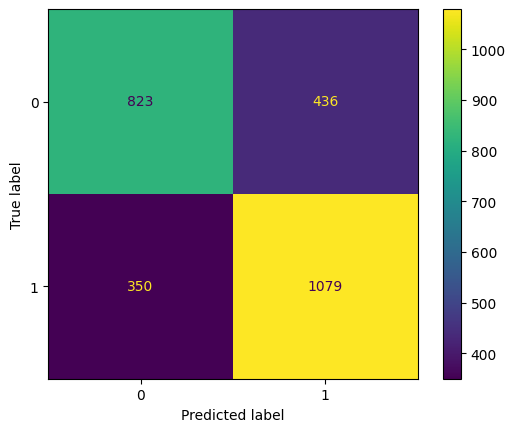

In [34]:
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#**Random Forest**

In [35]:
rf=ensemble.RandomForestClassifier(n_estimators=150,criterion='entropy',max_features=None,random_state=42)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)

checking result with defalt estimator

In [36]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_rf)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_rf)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_rf)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_rf)
print(recall)

0.8005952380952381
[[ 876  383]
 [ 153 1276]]
0.7691380349608198
0.8929321203638908


#**Grid for RF**

In [38]:
RF1=ensemble.RandomForestClassifier(n_estimators=10,criterion='entropy',max_features=None,random_state=42)
ntrees={'n_estimators':[100,200,300]}
grid_search=GridSearchCV(estimator=RF1,param_grid=ntrees,scoring='precision',cv=10)
grid_search.fit(X_train,Y_train)
best_ntrees=grid_search.best_params_
print(best_ntrees)

{'n_estimators': 100}


In [37]:
RF2=ensemble.RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=None,random_state=42)
RF2.fit(X_train,Y_train)
Y_pred_rf2=RF2.predict(X_test)

result for best grid

In [38]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_rf2)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_rf2)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_rf2)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_rf2)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_rf2)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,Y_pred_rf2)
print(test_auc)

0.7965029761904762
[[ 880  379]
 [ 168 1261]]
0.7689024390243903
0.8824352694191743
0.8217660475724992
0.7907013519454886


confusion metrix for rf

In [39]:
cmrf=metrics.confusion_matrix(Y_test,Y_pred_rf2)
print(cmrf)

[[ 880  379]
 [ 168 1261]]


graph of cm

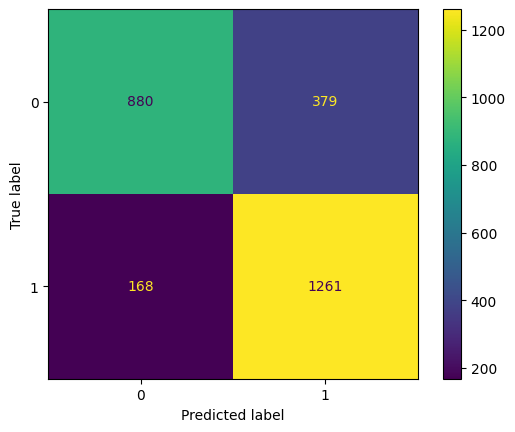

In [40]:
disp_rf=metrics.ConfusionMatrixDisplay(confusion_matrix=cmrf)
disp_rf.plot()

#**important feature of rf**

In [41]:
from pandas import Series
RF2_best_depth_imp_feat=RandomForestClassifier(criterion='entropy',n_estimators=100,max_leaf_nodes=None)
RF2_best_depth_imp_feat.fit(X_train,Y_train)
Y_pred_best_depth_imp_feat=RF2_best_depth_imp_feat.predict(X_test)
imp_features=Series(RF2_best_depth_imp_feat.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(imp_features)

surface_pressure             0.082485
relative_humidity_2m         0.070937
temperature_2m               0.064767
time_group                   0.061830
apparent_temperature         0.060187
winddirection_10m            0.058376
windgusts_10m                0.058355
windspeed_10m                0.058236
dewpoint_2m                  0.054702
cloudcover_low               0.042967
cloudcover                   0.038370
cloudcover_mid               0.037316
age_of_driver                0.037072
engine_capacity_cc           0.036647
age_of_vehicle               0.032631
cloudcover_high              0.031343
day_of_week                  0.029467
driver_imd_decile            0.029361
age_band_of_driver           0.019940
driver_distance_banding      0.016391
vehicle_type                 0.014825
journey_purpose_of_driver    0.013868
rain                         0.013228
precipitation                0.012277
sex_of_driver                0.010342
driver_home_area_type        0.009445
towing_and_a

In [42]:
imp_features.head(20)

,0
surface_pressure,0.082485
relative_humidity_2m,0.070937
temperature_2m,0.064767
time_group,0.061830
apparent_temperature,0.060187
winddirection_10m,0.058376
windgusts_10m,0.058355
windspeed_10m,0.058236
dewpoint_2m,0.054702
cloudcover_low,0.042967


#**XG Boosting**

checking for best using grid

In [45]:
xgb_est=XGBClassifier(
    random_state=42,
    n_jobs=-1,tree_method="hist",
    eval_metric="auc"
)
xgb_grid={
    "n_estimators":[500,550],
    "learning_rate":[0.02,0.3],
    "max_depth":[10,11],
}

In [46]:
xgb_cv=GridSearchCV(xgb_est,xgb_grid,scoring="roc_auc",cv=3,n_jobs=-1,verbose=0,refit=True)
xgb_cv.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.3], 'max_depth': [10, 11],
                         'n_estimators': [500, 550]},
             scoring='roc_auc')

the best grid for xgb

In [47]:
xgb_best=xgb_cv.best_estimator_
y_pred=xgb_best.predict(X_test)
y_proba=xgb_best.predict_proba(X_test)[:,1]
print("XGBoost best para:",xgb_cv.best_params_)

XGBoost best para: {'learning_rate': 0.3, 'max_depth': 11, 'n_estimators': 500}


#**best grid for xgb**

In [43]:
xgb_clf=XGBClassifier(
    n_estimators=500,
    learning_rate=0.3,
    max_depth=11,
    )

In [44]:
xgb_clf.fit(X_train,Y_train)
Y_pred_xgb=xgb_clf.predict(X_test)
y_proba_xgb=xgb_clf.predict_proba(X_test)[:,1]

results for xgb

In [45]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_xgb)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_xgb)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_xgb)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_xgb)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_xgb)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,y_proba_xgb)
print(test_auc)

0.8091517857142857
[[ 927  332]
 [ 181 1248]]
0.789873417721519
0.8733379986004198
0.8295114656031904
0.8863171866549646


cm for xgb

In [46]:
cm_xgb=metrics.confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

[[ 927  332]
 [ 181 1248]]


graph of xgb

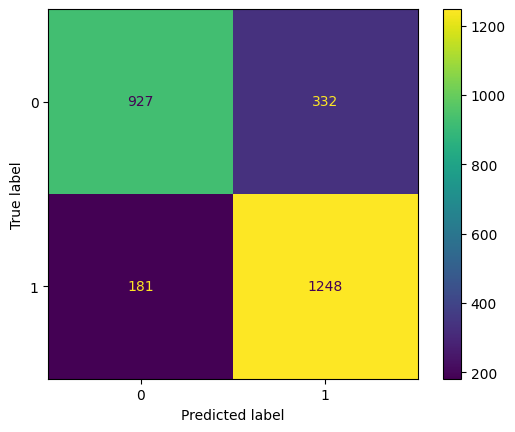

In [47]:
disp_xgb=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()

important feature of xgb

In [48]:
xgb_feat_imp=Series(xgb_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(xgb_feat_imp)

relative_humidity_2m         0.063549
precipitation                0.062296
time_group                   0.055615
towing_and_articulation      0.053959
driver_home_area_type        0.046282
temperature_2m               0.043418
vehicle_type                 0.042300
cloudcover                   0.041544
surface_pressure             0.040793
rain                         0.036587
driver_imd_decile            0.035367
windgusts_10m                0.034763
apparent_temperature         0.033914
winddirection_10m            0.033421
cloudcover_low               0.032170
cloudcover_high              0.031831
windspeed_10m                0.031189
journey_purpose_of_driver    0.030686
snowfall                     0.029830
day_of_week                  0.029535
dewpoint_2m                  0.029459
cloudcover_mid               0.028712
driver_distance_banding      0.027907
sex_of_driver                0.027710
engine_capacity_cc           0.026120
age_of_driver                0.025560
age_of_vehic

In [49]:
xgb_feat_imp.head(20)

,0
relative_humidity_2m,0.063549
precipitation,0.062296
time_group,0.055615
towing_and_articulation,0.053959
driver_home_area_type,0.046282
temperature_2m,0.043418
vehicle_type,0.042300
cloudcover,0.041544
surface_pressure,0.040793
rain,0.036587


#**Light GBM**

checking for best grid

In [55]:
lgb_est=LGBMClassifier(random_state=42,n_jobs=-1)
lgb_grid={
    "n_estimators":[450,550],
    "max_depth":[14,16],
    "learning_rate":[0.9,1.1],
    "num_leaves":[45,55]
}

In [56]:
lgb_cv=GridSearchCV(lgb_est,lgb_grid,scoring="roc_auc",cv=3,n_jobs=-1,verbose=0)
lgb_cv.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 5704, number of negative: 5047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 10751, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530555 -> initscore=0.122374
[LightGBM] [Info] Start training from score 0.122374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=3, estimator=LGBMClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.9, 1.1], 'max_depth': [14, 16],
                         'n_estimators': [450, 550], 'num_leaves': [45, 55]},
             scoring='roc_auc')

result of grid

In [57]:
lgb_best=lgb_cv.best_estimator_
y_pred=lgb_best.predict(X_test)
y_proba=lgb_best.predict_proba(X_test)[:,1]
print("LightGBM best para:",lgb_cv.best_params_)

LightGBM best para: {'learning_rate': 0.9, 'max_depth': 16, 'n_estimators': 550, 'num_leaves': 55}


training lgbm with best grid

In [50]:
lgbm_clf=LGBMClassifier(
    n_estimators=550,
    learning_rate=0.9,
    num_leaves=55,
    subsample=1,
    max_depth=16,
    boosting_type="gbdt"
    )

In [51]:
lgbm_clf.fit(X_train,Y_train)
Y_pred_lgbm=lgbm_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 5704, number of negative: 5047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 10751, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530555 -> initscore=0.122374
[LightGBM] [Info] Start training from score 0.122374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [52]:
y_proba_lgb=lgbm_clf.predict_proba(X_test)[:,1]

result of lgbm

In [53]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_lgbm)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_lgbm)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_lgbm)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_lgbm)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_lgbm)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,y_proba_lgb)
print(test_auc)

0.7924107142857143
[[ 909  350]
 [ 208 1221]]
0.7772119669000637
0.85444366689993
0.814
0.874726462124905


cm for lgbm

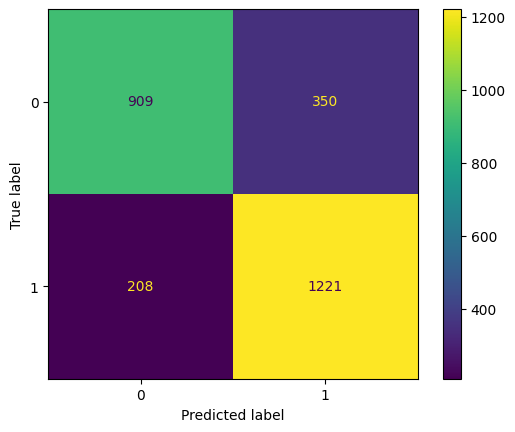

In [54]:
dis_lgbm=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
dis_lgbm.plot()

important feature of lgbm

In [55]:
lgbm_feat_imp=Series(lgbm_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(lgbm_feat_imp)

surface_pressure             1670
winddirection_10m            1602
windspeed_10m                1311
windgusts_10m                1179
dewpoint_2m                  1132
relative_humidity_2m         1066
temperature_2m               1042
time_group                    989
apparent_temperature          987
cloudcover_low                976
cloudcover_mid                945
age_of_driver                 847
cloudcover_high               791
cloudcover                    784
engine_capacity_cc            780
day_of_week                   560
age_of_vehicle                556
driver_imd_decile             509
journey_purpose_of_driver     215
driver_distance_banding       195
precipitation                 177
sex_of_driver                 167
vehicle_type                  157
rain                           62
driver_home_area_type          59
towing_and_articulation        32
age_band_of_driver             19
snowfall                        8
dtype: int32


In [56]:
lgbm_feat_imp.head(20)

,0
surface_pressure,1670
winddirection_10m,1602
windspeed_10m,1311
windgusts_10m,1179
dewpoint_2m,1132
relative_humidity_2m,1066
temperature_2m,1042
time_group,989
apparent_temperature,987
cloudcover_low,976


#**Catboost**

grid for catboost

In [65]:
cb_est=CatBoostClassifier(random_state=42,verbose=False)
cb_grid={
    "iterations": [800,1200,1600],
    "depth": [4,6,8],
    "l2_leaf_reg": [3,6, 10],
    "subsample": [0.7, 0.8, 1.0],
}


In [66]:
cb_cv=GridSearchCV(cb_est,cb_grid,scoring="roc_auc",cv=3,n_jobs=-1,verbose=0)
cb_cv.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c7d0cf9f980>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [800, 1200, 1600],
                         'l2_leaf_reg': [3, 6, 10],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='roc_auc')

best grid for catboost

In [67]:
cb_best=cb_cv.best_estimator_
y_pred=cb_best.predict(X_test).astype(int)
y_proba=cb_best.predict_proba(X_test)[:,1]
print("CatBoost best para:",cb_cv.best_params_)

CatBoost best para: {'depth': 8, 'iterations': 1600, 'l2_leaf_reg': 3, 'subsample': 1.0}


training catboost with best grid

In [57]:
cb_clf=CatBoostClassifier(
    iterations=1600,
    depth=8,
    l2_leaf_reg=3,
    loss_function="Logloss",
    subsample=1.0,
    )

In [58]:
cb_clf.fit(X_train,Y_train)
Y_pred_cb=cb_clf.predict(X_test).astype(int)
y_proba_cb=cb_clf.predict_proba(X_test)[:,1]

0:	learn: 0.6880887	total: 60.7ms	remaining: 1m 37s
1:	learn: 0.6821594	total: 71.8ms	remaining: 57.3s
2:	learn: 0.6765777	total: 82.4ms	remaining: 43.9s
3:	learn: 0.6711096	total: 93.2ms	remaining: 37.2s
4:	learn: 0.6669686	total: 106ms	remaining: 33.9s
5:	learn: 0.6635136	total: 116ms	remaining: 30.9s
6:	learn: 0.6600870	total: 128ms	remaining: 29.1s
7:	learn: 0.6561163	total: 140ms	remaining: 27.9s
8:	learn: 0.6524529	total: 151ms	remaining: 26.6s
9:	learn: 0.6489069	total: 161ms	remaining: 25.6s
10:	learn: 0.6465533	total: 171ms	remaining: 24.8s
11:	learn: 0.6429048	total: 182ms	remaining: 24.1s
12:	learn: 0.6405771	total: 194ms	remaining: 23.6s
13:	learn: 0.6377020	total: 205ms	remaining: 23.3s
14:	learn: 0.6358405	total: 216ms	remaining: 22.8s
15:	learn: 0.6333741	total: 227ms	remaining: 22.5s
16:	learn: 0.6307079	total: 238ms	remaining: 22.1s
17:	learn: 0.6280677	total: 248ms	remaining: 21.8s
18:	learn: 0.6270544	total: 252ms	remaining: 20.9s
19:	learn: 0.6255397	total: 265ms	re

result for catboost

In [59]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_cb)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_cb)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_cb)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_cb)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_cb)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,y_proba_cb)
print(test_auc)

0.7942708333333334
[[ 895  364]
 [ 189 1240]]
0.773067331670823
0.867739678096571
0.8176722716782064
0.880029081029464


important feature for catboost

In [60]:
cb_feat_imp=Series(cb_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(cb_feat_imp)

time_group                   10.399220
relative_humidity_2m          9.674054
surface_pressure              8.707733
winddirection_10m             7.470638
windgusts_10m                 5.960560
windspeed_10m                 5.870467
cloudcover_low                5.545073
temperature_2m                5.324360
cloudcover_mid                4.673762
dewpoint_2m                   4.572471
day_of_week                   3.967357
cloudcover                    3.821954
apparent_temperature          3.512758
cloudcover_high               3.202457
driver_imd_decile             2.524946
engine_capacity_cc            2.258593
age_of_driver                 2.068885
age_of_vehicle                1.655545
vehicle_type                  1.367370
journey_purpose_of_driver     1.361640
driver_distance_banding       1.183741
rain                          1.098682
precipitation                 1.044304
driver_home_area_type         0.853743
sex_of_driver                 0.832122
age_band_of_driver       

In [61]:
cb_feat_imp.head(20)

,0
time_group,10.399220
relative_humidity_2m,9.674054
surface_pressure,8.707733
winddirection_10m,7.470638
windgusts_10m,5.960560
windspeed_10m,5.870467
cloudcover_low,5.545073
temperature_2m,5.324360
cloudcover_mid,4.673762
dewpoint_2m,4.572471


In [62]:
cm_cb=metrics.confusion_matrix(Y_test,Y_pred_cb)
print(cm_cb)

[[ 895  364]
 [ 189 1240]]


catboost cm graph

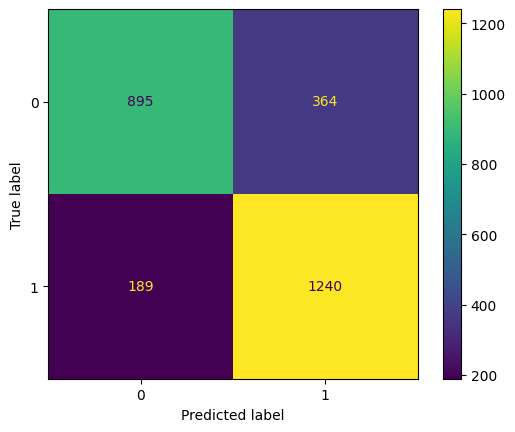

In [63]:
disp_cb=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_cb)
disp_cb.plot()

#**COMPARISON OF MODELS**

In [64]:
models={
    "Decision Tree":d_b,
    "Random Forest":RF2,
    "XGBoost":xgb_clf,
    "LightGBM":lgbm_clf,
    "CatBoost":cb_clf
}#loading models

In [65]:
rows=[]#taking values of models
for model_name, m in models.items():
    y_pred=m.predict(X_test)
    if hasattr(y_pred,"ravel"):y_pred=y_pred.ravel()
    try:
      y_pred=y_pred.astype(int)
    except:
      pass

    y_proba=m.predict_proba(X_test)[:,1]
    rows.append({
        "model":model_name,
        "accuracy":metrics.accuracy_score(Y_test,y_pred),
        "precision":metrics.precision_score(Y_test,y_pred),
        "recall":metrics.recall_score(Y_test,y_pred),
        "f1_score":metrics.f1_score(Y_test,y_pred),
        "auc":metrics.roc_auc_score(Y_test,y_proba)
    })

In [66]:
#values models
df=pd.DataFrame(rows).sort_values("auc",ascending=False)
print("\nModel Comparison")
print(df.to_string(index=False))


Model Comparison
        model  accuracy  precision   recall  f1_score      auc
      XGBoost  0.809152   0.789873 0.873338  0.829511 0.886317
Random Forest  0.796503   0.768902 0.882435  0.821766 0.882809
     CatBoost  0.794271   0.773067 0.867740  0.817672 0.880029
     LightGBM  0.792411   0.777212 0.854444  0.814000 0.874726
Decision Tree  0.707589   0.712211 0.755073  0.733016 0.723200


In [67]:
#ploting
def plot_bars(metric, title):
  order=df.sort_values(metric,ascending=True)
  plt.figure(figsize=(6,3.8))
  bar=plt.barh(order["model"],order[metric])
  for b, v in zip(bar, order[metric]):
    plt.text(v+0.005,b.get_y()+b.get_height()/2,f"{v:.3f}",va="center")
  plt.xlim(0,1)
  plt.xlabel(metric)
  plt.title(title)
  plt.tight_layout()
  plt.show()

#**Accuracy Comparison**

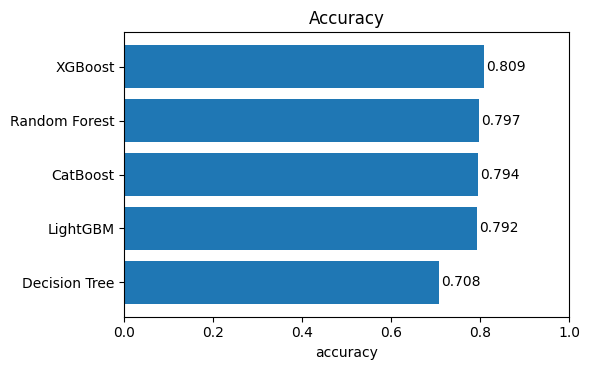

In [68]:
plot_bars("accuracy","Accuracy")

#**Precision Comparison**

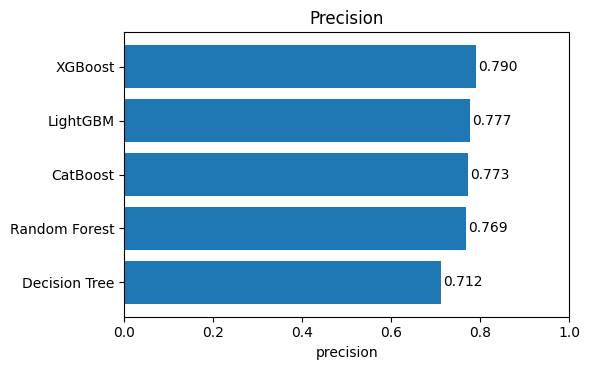

In [69]:
plot_bars("precision","Precision")

#**Recall Comparison**

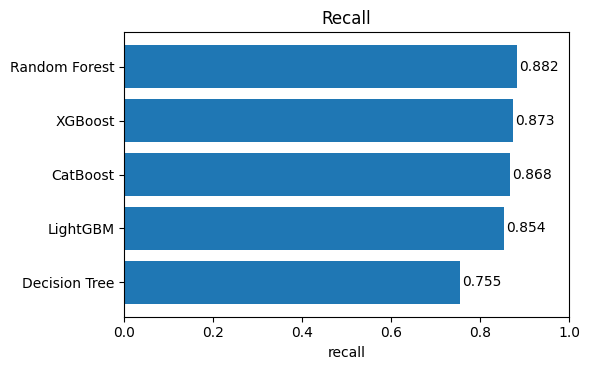

In [70]:
plot_bars("recall","Recall")

#**F1 Comparsion**

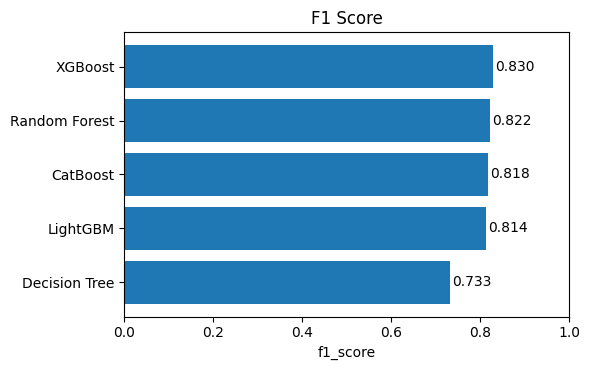

In [71]:
plot_bars("f1_score","F1 Score")

#**AUC comparison**

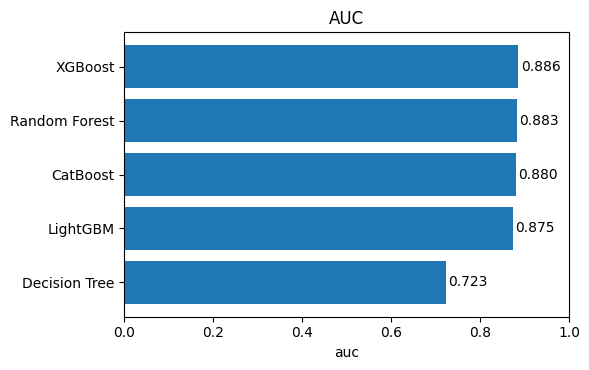

In [72]:
plot_bars("auc","AUC")

#**Colleration checking**

In [73]:
dfc=pd.concat([X_train,pd.Series(Y_train,index=X_train.index, name="target")],axis=1)
dfc=dfc.select_dtypes(include=np.number)

In [74]:
tgt=dfc.corr(numeric_only=True)["target"].drop("target").abs().sort_values(ascending=False)
print("Top-20 | corr(feature,target)|:\n",tgt.head(20).to_string())

Top-20 | corr(feature,target)|:
 relative_humidity_2m         0.236320
temperature_2m               0.210475
surface_pressure             0.187290
apparent_temperature         0.184927
dewpoint_2m                  0.096569
windgusts_10m                0.081269
towing_and_articulation      0.073532
driver_imd_decile            0.072521
windspeed_10m                0.060779
cloudcover                   0.045774
sex_of_driver                0.037466
cloudcover_low               0.027125
journey_purpose_of_driver    0.024260
snowfall                     0.014604
winddirection_10m            0.012806
precipitation                0.012307
cloudcover_mid               0.011545
rain                         0.010987
age_of_driver                0.009921
time_group                   0.008970


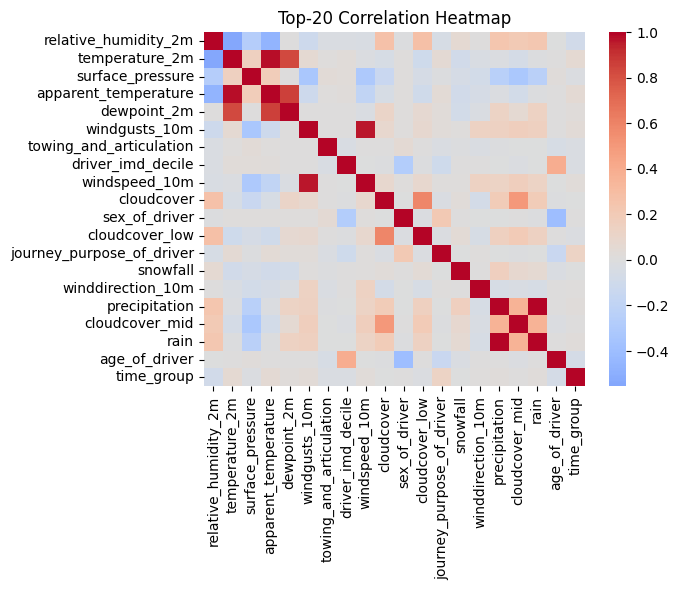

In [75]:
top=list(tgt.head(20).index)
plt.figure(figsize=(7,6))
sns.heatmap(dfc[top].corr(),cmap="coolwarm",center=0)
plt.title("Top-20 Correlation Heatmap")
plt.tight_layout()
plt.show()

#**Checking PCA**

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtr=scaler.fit_transform(X_train)
Xte=scaler.transform(X_test)

In [77]:
pca=PCA(n_components=10,random_state=42)
evr=pca.fit(Xtr).explained_variance_ratio_
print("Explained variance ratio",evr)

Explained variance ratio [0.1306474  0.12193533 0.10229868 0.07229217 0.05403455 0.04609866
 0.04321496 0.03772592 0.0372337  0.03623612]


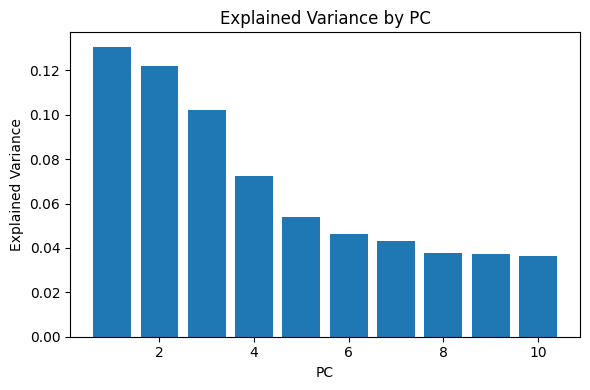

In [78]:
plt.figure(figsize=(6,4))
plt.bar(range(1,len(evr)+1),evr)
plt.xlabel("PC");plt.ylabel("Explained Variance")
plt.title("Explained Variance by PC")
plt.tight_layout()
plt.show()

#**PCA 2D**

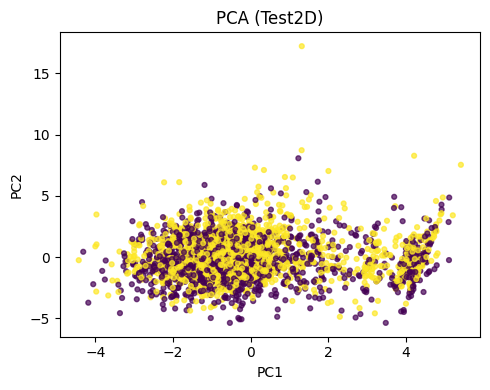

In [79]:
Z=PCA(n_components=2,random_state=42).fit(Xtr).transform(Xte)
plt.figure(figsize=(5,4))
plt.scatter(Z[:,0],Z[:,1],c=Y_test,s=12,alpha=0.7)
plt.xlabel("PC1");plt.ylabel("PC2")
plt.title("PCA (Test2D)")
plt.tight_layout()
plt.show()

#**ROC and Precision curve comparison**

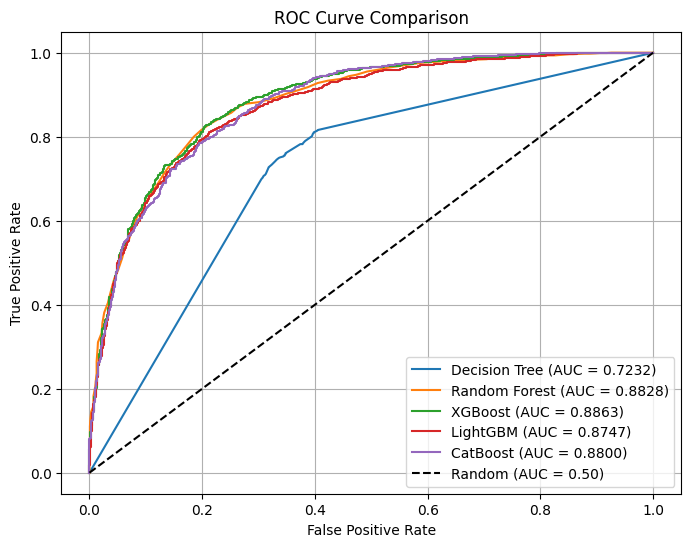

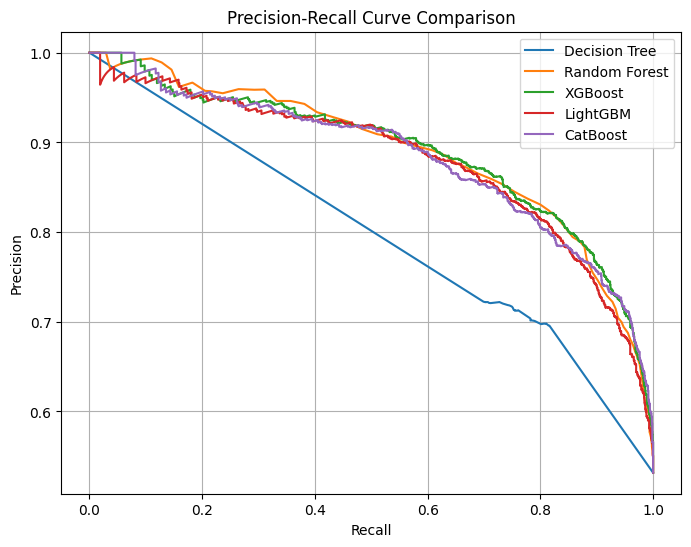

In [80]:
plt.figure(figsize=(8, 6))
for model_name, m in models.items():
    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_proba)
        auc_score = roc_auc_score(Y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for model_name, m in models.items():
    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test)[:, 1]
        prec, rec, _ = precision_recall_curve(Y_test, y_proba)
        plt.plot(rec, prec, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

#**Checking For Overfit Trainset**

In [81]:
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,precision_score,recall_score

def split_report(model,X_tr,X_te,Y_tr,Y_te):
    ytr_p=model.predict(X_tr); ytr_s=model.predict_proba(X_tr)[:,1]
    yte_p=model.predict(X_te); yte_s=model.predict_proba(X_te)[:,1]
    def M(y,p,s):
      return dict(AUC=roc_auc_score(y,s),
                  ACC=accuracy_score(y,p),
                  F1=f1_score(y,p),
                  P=precision_score(y,p),
                  R=recall_score(y,p))
    tr, te = M(Y_tr,ytr_p,ytr_s), M(Y_te,yte_p,yte_s)
    print("Train:",tr);print("Test:",te)
    print("Gaps:",{K:round(tr[K]-te[K],4) for K in tr})

split_report(xgb_clf,X_train,X_test,Y_train,Y_test)

Train: {'AUC': np.float64(1.0), 'ACC': 1.0, 'F1': np.float64(1.0), 'P': np.float64(1.0), 'R': np.float64(1.0)}
Test: {'AUC': np.float64(0.8863171866549646), 'ACC': 0.8091517857142857, 'F1': np.float64(0.8295114656031904), 'P': np.float64(0.789873417721519), 'R': np.float64(0.8733379986004198)}
Gaps: {'AUC': np.float64(0.1137), 'ACC': 0.1908, 'F1': np.float64(0.1705), 'P': np.float64(0.2101), 'R': np.float64(0.1267)}


#**making XGB strick**

#making xgb more strict to avoid overfiting

In [82]:
XXX=[
        "snowfall","towing_and_articulation","vehicle_type","precipitation","driver_home_area_type",
    "relative_humidity_2m","time_group","rain","surface_pressure","temperature_2m",
    "driver_distance_banding","windgusts_10m","driver_imd_decile","apparent_temperature","cloudcover",
    "cloudcover_low","sex_of_driver","winddirection_10m","windspeed_10m","journey_purpose_of_driver","cloudcover_high",
    "cloudcover_mid","day_of_week","dewpoint_2m","age_of_vehicle","engine_capacity_cc",
    "age_of_driver","age_band_of_driver"
]

In [83]:
x=XX[XXX]
y=YY

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13439 entries, 0 to 14265
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   snowfall                   13439 non-null  float64
 1   towing_and_articulation    13439 non-null  float64
 2   vehicle_type               13439 non-null  float64
 3   precipitation              13439 non-null  float64
 4   driver_home_area_type      13439 non-null  float64
 5   relative_humidity_2m       13439 non-null  int64  
 6   time_group                 13439 non-null  int32  
 7   rain                       13439 non-null  float64
 8   surface_pressure           13439 non-null  float64
 9   temperature_2m             13439 non-null  float64
 10  driver_distance_banding    13439 non-null  float64
 11  windgusts_10m              13439 non-null  float64
 12  driver_imd_decile          13439 non-null  float64
 13  apparent_temperature       13439 non-null  float64


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=Y)

In [86]:
xgb_clf=XGBClassifier(
    n_estimators=5000,
    learning_rate=0.02,
    max_depth=3,
    min_child_weight=16,
    gamma=2.0,
    subsample=0.65,
    colsample_bytree=0.65,
    colsample_bynode=0.65,
    colsample_bylevel=0.75,
    reg_alpha=2.0,reg_lambda=6.0,
    tree_method="hist",
    eval_metric="auc",
    random_state=42,n_jobs=-1

    )

In [87]:
xgb_clf.fit(X_train,Y_train)
Y_pred_xgb=xgb_clf.predict(X_test)
y_proba_xgb=xgb_clf.predict_proba(X_test)[:,1]

checking results

In [88]:
accuracy=metrics.accuracy_score(Y_test,Y_pred_xgb)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred_xgb)
print(confusion_matrix)
precision=metrics.precision_score(Y_test,Y_pred_xgb)
print(precision)
recall=metrics.recall_score(Y_test,Y_pred_xgb)
print(recall)
f1_score=metrics.f1_score(Y_test,Y_pred_xgb)
print(f1_score)
test_auc=metrics.roc_auc_score(Y_test,y_proba_xgb)
print(test_auc)

0.7239583333333334
[[ 821  440]
 [ 302 1125]]
0.7188498402555911
0.7883672039243167
0.7520053475935828
0.8002619693717014


checking overfit again

In [89]:
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,precision_score,recall_score

def split_report(model,X_tr,X_te,Y_tr,Y_te):
    ytr_p=model.predict(X_tr); ytr_s=model.predict_proba(X_tr)[:,1]
    yte_p=model.predict(X_te); yte_s=model.predict_proba(X_te)[:,1]
    def M(y,p,s):
      return dict(AUC=roc_auc_score(y,s),
                  ACC=accuracy_score(y,p),
                  F1=f1_score(y,p),
                  P=precision_score(y,p),
                  R=recall_score(y,p))
    tr, te = M(Y_tr,ytr_p,ytr_s), M(Y_te,yte_p,yte_s)
    print("Train:",tr);print("Test:",te)
    print("Gaps:",{K:round(tr[K]-te[K],4) for K in tr})

split_report(xgb_clf,X_train,X_test,Y_train,Y_test)

Train: {'AUC': np.float64(0.8745682652134992), 'ACC': 0.791647288624314, 'F1': np.float64(0.8108108108108109), 'P': np.float64(0.7825236387349201), 'R': np.float64(0.8412197686645636)}
Test: {'AUC': np.float64(0.8002619693717014), 'ACC': 0.7239583333333334, 'F1': np.float64(0.7520053475935828), 'P': np.float64(0.7188498402555911), 'R': np.float64(0.7883672039243167)}
Gaps: {'AUC': np.float64(0.0743), 'ACC': 0.0677, 'F1': np.float64(0.0588), 'P': np.float64(0.0637), 'R': np.float64(0.0529)}


#**Validation metrics**

In [90]:
!pip install -U scikit-learn==1.4.2 xgboost==1.7.6

In [91]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, Y_train, test_size=0.15, stratify=Y_train, random_state=42
)

In [92]:
xgb_clf=XGBClassifier(
    n_estimators=5000,
    learning_rate=0.02,
    max_depth=3,
    min_child_weight=16,
    gamma=2.0,
    subsample=0.65,
    colsample_bytree=0.65,
    colsample_bynode=0.65,
    colsample_bylevel=0.75,
    reg_alpha=2.0,reg_lambda=6.0,
    tree_method="hist",
    eval_metric="auc",
    random_state=42,n_jobs=-1

    )

In [93]:
xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=200,
    verbose=False
)

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.75, colsample_bynode=0.65,
              colsample_bytree=0.65, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=2.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=16, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [94]:
def _metrics(model, X, y, thr=0.5):
    proba = model.predict_proba(X)[:, 1]
    pred  = (proba >= thr).astype(int)
    return {
        "AUC": roc_auc_score(y, proba),
        "ACC": accuracy_score(y, pred),
        "F1" : f1_score(y, pred),
        "P"  : precision_score(y, pred),
        "R"  : recall_score(y, pred),
    }

In [95]:
print("XGB  VAL :", {k: round(v,4) for k,v in _metrics(xgb_clf, X_val, y_val).items()})
print("XGB  TEST:", {k: round(v,4) for k,v in _metrics(xgb_clf, X_test, Y_test).items()})

XGB  VAL : {'AUC': np.float64(0.791), 'ACC': 0.7142, 'F1': np.float64(0.7466), 'P': np.float64(0.7051), 'R': np.float64(0.7932)}
XGB  TEST: {'AUC': np.float64(0.7963), 'ACC': 0.7221, 'F1': np.float64(0.7521), 'P': np.float64(0.7144), 'R': np.float64(0.794)}


#**OOF(out-of-fold) vs test**

In [96]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_prob = np.zeros(len(X_train))
oof_pred = np.zeros(len(X_train), dtype=int)

In [97]:
best_iter = getattr(xgb_clf, "best_iteration", None) or getattr(xgb_clf, "best_iteration_", None)
oof_params = xgb_clf.get_params()
if best_iter:
    oof_params["n_estimators"] = int(best_iter)

In [98]:
for tr_idx, va_idx in skf.split(X_train, Y_train):
    m = XGBClassifier(**oof_params)
    m.fit(X_train.iloc[tr_idx], Y_train.iloc[tr_idx], verbose=False)
    p = m.predict_proba(X_train.iloc[va_idx])[:, 1]
    oof_prob[va_idx] = p
    oof_pred[va_idx] = (p >= 0.5).astype(int)

In [99]:
oof = {
    "AUC": roc_auc_score(Y_train, oof_prob),
    "ACC": accuracy_score(Y_train, oof_pred),
    "F1" : f1_score(Y_train, oof_pred),
    "P"  : precision_score(Y_train, oof_pred),
    "R"  : recall_score(Y_train, oof_pred),
}
test = _metrics(xgb_clf, X_test, Y_test)

In [100]:
print("OOF (train-like):", {k: round(v,4) for k,v in oof.items()})
print("TEST            :", {k: round(v,4) for k,v in test.items()})
print("GAP OOF-TEST    :", {k: round(oof[k]-test[k],4) for k in oof})

OOF (train-like): {'AUC': np.float64(0.7839), 'ACC': 0.7137, 'F1': np.float64(0.7405), 'P': np.float64(0.7135), 'R': np.float64(0.7697)}
TEST            : {'AUC': np.float64(0.7963), 'ACC': 0.7221, 'F1': np.float64(0.7521), 'P': np.float64(0.7144), 'R': np.float64(0.794)}
GAP OOF-TEST    : {'AUC': np.float64(-0.0124), 'ACC': -0.0084, 'F1': np.float64(-0.0116), 'P': np.float64(-0.0009), 'R': np.float64(-0.0243)}


downloading trainded model for django

In [101]:
joblib.dump(xgb_clf,"accident_model.pkl")

['accident_model.pkl']

In [102]:
from google.colab import files
files.download("accident_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>